#  Lab 1



##  Hand-Written Digit Recognition

In [83]:
import numpy as np
import pandas as df

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
#Upload


<h1>Import Digits Data</h1>

In [49]:
from sklearn import datasets, metrics
from sklearn.datasets import load_digits
digits = load_digits()

<h1>See what they look like</h1>

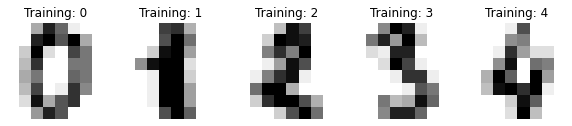

In [50]:
import matplotlib.pyplot as plt
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

<h1>Question 0</h1>

Split the digits.data and digits.target into train and test data. Create a dummy classifier for the digits data, with a strategy of "most_frequent", and print the score on test data. 

In [51]:
X_train,X_test,y_train,y_test = train_test_split(digits.data, digits.target)


In [52]:
dummy=DummyClassifier(strategy="most_frequent")
dummy.fit(X_train,y_train)
dummy.score(X_test, y_test)

0.07777777777777778

<h1>Question 1</h1>
Create a logistic regression model for the digits data and print the score on test data. Use metrics.classification_report to give a more detailed report of results.

In [53]:
log_clf = LogisticRegression(max_iter=10000)
log_clf.fit(X_train,y_train)
y_pred = log_clf.predict(X_test)
metrics.classification_report(y_test, y_pred)


'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        55\n           1       0.96      0.96      0.96        52\n           2       0.98      1.00      0.99        43\n           3       0.98      0.91      0.94        46\n           4       0.97      1.00      0.99        38\n           5       1.00      0.91      0.95        45\n           6       0.96      0.98      0.97        45\n           7       0.96      0.98      0.97        52\n           8       0.86      0.92      0.89        39\n           9       0.97      0.97      0.97        35\n\n    accuracy                           0.96       450\n   macro avg       0.96      0.96      0.96       450\nweighted avg       0.97      0.96      0.96       450\n'

<h1>Question 2</h1>
Create a 3-way split of the data, using train_test_split. First split into trainval and test, and then split trainval into train and val. 

In [54]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

<h1>Question 3</h1>
Create a logistic regression classifier for the digits data. Write a loop that tries at least 4 values ranging from .001 to 1.0 for C. Use the val data to determine the best value. Then train on the combined train and val data, and score the resulting model on test. Use metrics.ConfusionMatrixDisplay.from_predictions to display a confusion matrix for all 10 classes. 

In [47]:
c_list = [0.001, 0.01, 0.1, 1]
evaluation = {}
for c in c_list:
    
    log_reg=LogisticRegression(C=c,max_iter=10000)
    log_reg.fit(X_train,y_train)
    y_pred=log_reg.predict(X_val)
    evaluation[c] = metrics.accuracy_score(y_val,y_pred)

print(evaluation)

Best_c=max(zip(evaluation.values(), evaluation.keys()))[1]
print(Best_c)



{0.001: 0.9465875370919882, 0.01: 0.9643916913946587, 0.1: 0.9614243323442137, 1: 0.9584569732937686}
0.01


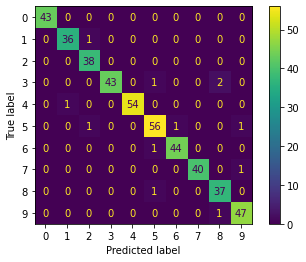

In [64]:
Xtrain = np.concatenate((X_train, X_val))
ytrain=np.concatenate((y_train,y_val))
log_reg_t = LogisticRegression(C=Best_c, max_iter=10000)
log_reg_t.fit(Xtrain,ytrain)
y_pred=log_reg_t.predict(X_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)



<h1>Question 4</h1>
Create a Decision Tree classifier for the digits data. Write a loop that tries values of 1 through 20 for maximum depth. Use the val data to determine the best value. 

In [69]:
tree_evaluation={}
for i in range(1,21):
    depth=i
    tree_clf=DecisionTreeClassifier(max_depth=i)
    tree_clf.fit(X_train,y_train)
    y_pred=tree_clf.predict(X_val)
    tree_evaluation[i]=metrics.accuracy_score(y_val,y_pred)
    

In [70]:
Best_max_depth=max(zip(tree_evaluation.values(), tree_evaluation.keys()))[1]
print(Best_max_depth)

18


<h1>Question 5</h1>
Now train the best decision tree model on the combined train and val data, and score the resulting model on test.  
Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.


In [75]:
best_tree_clf=DecisionTreeClassifier(max_depth=Best_max_depth)
best_tree_clf.fit(Xtrain,ytrain)
y_pred=best_tree_clf.predict(X_test)
metrics.classification_report(y_test,y_pred)


'              precision    recall  f1-score   support\n\n           0       0.93      0.91      0.92        43\n           1       0.84      0.86      0.85        37\n           2       0.94      0.82      0.87        38\n           3       0.76      0.85      0.80        46\n           4       0.89      0.93      0.91        55\n           5       0.93      0.86      0.89        59\n           6       0.90      0.96      0.92        45\n           7       0.91      0.95      0.93        41\n           8       0.77      0.71      0.74        38\n           9       0.88      0.88      0.88        48\n\n    accuracy                           0.88       450\n   macro avg       0.87      0.87      0.87       450\nweighted avg       0.88      0.88      0.88       450\n'

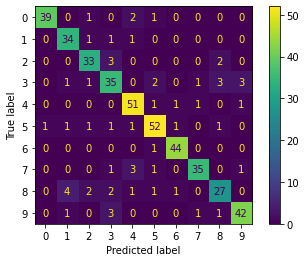

In [74]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

<h1>Question 6</h1>
Create a Random Forest classifier for the digits data. Use the val data to determine the best values for 
<ul>
    <li>number of estimators (from 50 to 500 by 50s)</li>
    <li>Max depth (from 10 to 50 by 10s)</li>
    </ul>
        

In [79]:
n_estimators=list(range(50,550,50))
max_depths=list(range(10,60,10))
rf_evaluation={}

for estimator in n_estimators:
    for depth in max_depths:
        rf_clf=RandomForestClassifier(n_estimators=estimator, max_depth=depth)
        rf_clf.fit(X_train,y_train)
        y_pred=rf_clf.predict(X_val)
        rf_evaluation[(estimator,depth)]=metrics.accuracy_score(y_val,y_pred)




In [80]:
Best_rf_val=max(zip(rf_evaluation.values(), rf_evaluation.keys()))[1]
print(Best_rf_val)

(500, 40)


<h1>Question 7</h1>
Now train the best random forest model on the combined train and val data, and score the resulting model on test.  

Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.

In [84]:
best_rf=RandomForestClassifier(n_estimators=500, max_depth=40)
best_rf.fit(Xtrain,ytrain)
y_pred=best_rf.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       1.00      0.93      0.97        46
           4       0.98      1.00      0.99        55
           5       0.95      0.98      0.97        59
           6       0.98      0.98      0.98        45
           7       0.98      0.98      0.98        41
           8       0.95      0.95      0.95        38
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



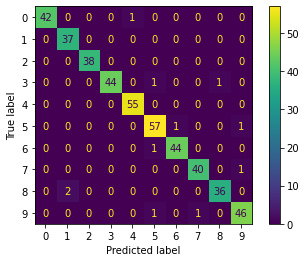

In [82]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

# <h1>Question 8</h1>
Create a MLP classifier for the digits data. Use the val data to determine the best values for 
hidden layer sizes. Try values from (10,10) to (210,210), increasing by 50s. You can use two nested loops for variables H1 and H2, and then assign (H1,H2) to the parameter hidden_layer_sizes.
<p> Print the best values for the two hidden layer sizes</p>
    
        

In [93]:
h1_list=list(range(10,211,50))
h2_list=h1_list.copy()
MLP_evaluation={}

for h1 in h1_list:
    for h2 in h2_list:
        MLP_clf=MLPClassifier(hidden_layer_sizes=(h1,h2), max_iter=10000)
        MLP_clf.fit(X_train,y_train)
        y_pred=MLP_clf.predict(X_val)
        MLP_evaluation[(h1,h2)]=metrics.accuracy_score(y_val,y_pred)


In [95]:
Best_hidden_layers=max(zip(MLP_evaluation.values(),MLP_evaluation.keys()))[1]
print(Best_hidden_layers)

(110, 60)


<h1>Question 9</h1>

Now train the best mlp model on the combined train and val data, and score the resulting model on test.  

Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.

In [96]:
best_MLP_clf=MLPClassifier(hidden_layer_sizes=Best_hidden_layers,max_iter=10000)
best_MLP_clf.fit(Xtrain,ytrain)
y_pred=best_MLP_clf.predict(X_test)
metrics.classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99        43\n           1       0.97      1.00      0.99        37\n           2       0.95      0.97      0.96        38\n           3       1.00      0.96      0.98        46\n           4       1.00      1.00      1.00        55\n           5       0.97      0.95      0.96        59\n           6       0.98      0.98      0.98        45\n           7       1.00      0.98      0.99        41\n           8       0.95      0.95      0.95        38\n           9       0.96      0.98      0.97        48\n\n    accuracy                           0.98       450\n   macro avg       0.97      0.98      0.98       450\nweighted avg       0.98      0.98      0.98       450\n'

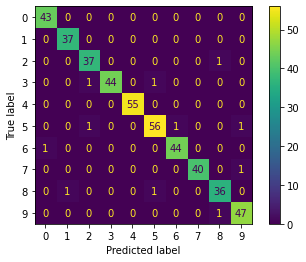

In [97]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)